In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [41]:
df = pd.read_csv('Salary.csv')
df.head()

# data preprocessing

# set target variable
# values.reshape turns the column into a 2D array
y = df['Salary'].values.reshape(-1, 1)
X = df.drop(columns=['Salary'])

# broaden categories
categories = {
    'Software Engineer': 'Technology',
    'Data Analyst': 'Technology',
    'Web Developer': 'Technology',
    'Software Manager': 'Technology',
    'Data Engineer': 'Technology',
    'Full Stack Engineer': 'Technology',
    'Software Architect': 'Technology',
    'Software Developer': 'Technology',
    'Software Engineer Manager': 'Technology',
    'Front End Developer': 'Technology',
    'Back end Developer': 'Technology',
    'Technical Support Specialist': 'Technology',
    'IT Support': 'Technology',
    'Network Engineer': 'Technology',
    'IT Manager': 'Technology',

    # business
    'Sales Associate': 'Business',
    'Marketing Analyst': 'Business',
    'Marketing Coordinator': 'Business',
    'Financial Analyst': 'Business',
    'Marketing Manager': 'Business',
    'Sales Director': 'Business',
    'Business Analyst': 'Business',
    'Financial Manager': 'Business',
    'Consultant': 'Business',
    'Account Manager': 'Business',
    'Account Executive': 'Business',
    'Customer Success Manager': 'Business',
    'Business Development Manager': 'Business',
    'Business Operations Analyst': 'Business',
    'Strategy Consultant': 'Business',

    # human resources
    'HR Manager': 'Human Resources',
    'Customer Service Rep': 'Human Resources',
    'Recruiter': 'Human Resources',
    'HR Generalist': 'Human Resources',
    'HR Coordinator': 'Human Resources',
    'Human Resources Manager': 'Human Resources',
    'HR Specialist': 'Human Resources',
    'Technical Recruiter': 'Human Resources',

    # information technology
    'IT Support Specialist': 'Information Technology',
    'Help Desk Analyst': 'Information Technology',
    'IT Project Manager': 'Information Technology',

    # social media
    'Social Media Specialist': 'Social Media',
    'Social Media Manager': 'Social Media',

    # creative
    'Graphic Designer': 'Creative',
    'UX Designer': 'Creative',
    'Copywriter': 'Creative',
    'Creative Director': 'Creative',
    'Digital Content Producer': 'Creative',
    'Designer': 'Creative',
    'Web Designer': 'Creative',

    # research and science
    'Data Scientist': 'Research and Science',
    'Research Scientist': 'Research and Science',
    'Principal Scientist': 'Research and Science',
    'Researcher': 'Research and Science',

    # miscellaneous
    'Manager': 'Miscellaneous',
    'Director': 'Miscellaneous',
    'Product Manager': 'Miscellaneous',
    'Sales Manager': 'Miscellaneous',
    'Scientist': 'Miscellaneous',
    'Project Manager': 'Miscellaneous',
    'Operations Manager': 'Miscellaneous',
    'Engineer': 'Miscellaneous',
    'Data Entry Clerk': 'Miscellaneous',
    'VP of Operations': 'Miscellaneous',
    'Developer': 'Miscellaneous',
    'Operations Director': 'Miscellaneous',
    'Event Coordinator': 'Miscellaneous',
    'Customer Service Representative': 'Miscellaneous'
}

# at product designer

print(df['Job Title'].unique())

for category in categories:
    for i in range(len(df['Job Title'])):
        if category == df['Job Title'][i]:
            df.loc[i, 'Job Title'] = categories[category]

print(df['Job Title'].unique())


# exploratory data analysis

# data is not standardized

['Software Engineer' 'Data Analyst' 'Manager' 'Sales Associate' 'Director'
 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Scientist' 'Software Developer' 'HR Manager'
 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Engineer' 'Data Entry Clerk'
 'Sales Director' 'Business Analyst' 'VP of Operations' 'IT Support'
 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Developer' 'Consultant' 'Product Designer' 'CEO'
 'Accountant' 'Data Scientist' 'Marketing Specialist' 'Technical Writer'
 'HR Generalist' 'Project Engineer' 'Customer Success Rep'
 'Sales Executive' 'UX Designer' 'Operations Director' 'Network Engineer'
 'Administrative Assistant' 'Strategy Consultant' 'Copywriter'
 'Account Manager' 'Director of Marketing' 'Help Desk Analyst'
 'Customer Service Manager' 'Business Intelligence Analyst'
 'Event Coordinator' 'VP of Finance' 'Graphic Designer' 'UX Researcher'
 'S

In [19]:
df.head

<bound method NDFrame.head of        Age  Gender  Education Level              Job Title  \
0     32.0    Male                1      Software Engineer   
1     28.0  Female                2           Data Analyst   
2     45.0    Male                3                Manager   
3     36.0  Female                1        Sales Associate   
4     52.0    Male                2               Director   
...    ...     ...              ...                    ...   
6679  49.0  Female                3  Director of Marketing   
6680  32.0    Male                0        Sales Associate   
6681  30.0  Female                1      Financial Manager   
6682  46.0    Male                2      Marketing Manager   
6683  26.0  Female                0        Sales Executive   

      Years of Experience    Salary    Country        Race  Senior  
0                     5.0   90000.0         UK       White       0  
1                     3.0   65000.0        USA    Hispanic       0  
2                 

In [21]:
## Data Understanding
# dataset statistics.
print("X shapes: ", X.shape)
print("y shapes: ", y.shape)
print(df.describe())
print("\n")

# attribute counts and their datatypes.
print(df.info())

X shapes:  (6684, 8)
y shapes:  (6684, 1)
               Age  Education Level  Years of Experience         Salary  \
count  6684.000000      6684.000000          6684.000000    6684.000000   
mean     33.610563         1.622382             8.077723  115307.175194   
std       7.595994         0.880474             6.029305   52806.810881   
min      21.000000         0.000000             0.000000     350.000000   
25%      28.000000         1.000000             3.000000   70000.000000   
50%      32.000000         1.000000             7.000000  115000.000000   
75%      38.000000         2.000000            12.000000  160000.000000   
max      62.000000         3.000000            34.000000  250000.000000   

            Senior  
count  6684.000000  
mean      0.143477  
std       0.350585  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (tot

In [23]:
# unique elements
print("Job titles: ", df['Job Title'].value_counts())
print("Countries: ", df['Country'].value_counts())
print("Races: ", df['Race'].value_counts())

Job titles:  Job Title
Software Engineer                 809
Data Scientist                    515
Data Analyst                      391
Software Engineer Manager         376
Product Manager                   323
                                 ... 
Customer Support Specialist         1
VP of Finance                       1
Director of Product Management      1
CEO                                 1
Human Resources Director            1
Name: count, Length: 129, dtype: int64
Countries:  Country
USA          1356
China        1339
Australia    1335
UK           1332
Canada       1322
Name: count, dtype: int64
Races:  Race
White               1957
Asian               1599
Korean               457
Australian           452
Chinese              443
Black                435
African American     352
Mixed                334
Welsh                333
Hispanic             322
Name: count, dtype: int64


In [33]:
# eliminating columns with strings and the column with the target variable
#X = df.drop(columns=['Gender', 'Job Title', 'Salary', 'Country', 'Race'])
# TEST: One-hot encoding
from sklearn.preprocessing import OneHotEncoder
df = df.drop(columns=['Job Title'])
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# Display the resulting dataframe
print(f"Encoded Employee data : \n{df_encoded}")

Encoded Employee data : 
       Age  Education Level  Years of Experience    Salary  Senior  \
0     32.0                1                  5.0   90000.0       0   
1     28.0                2                  3.0   65000.0       0   
2     45.0                3                 15.0  150000.0       1   
3     36.0                1                  7.0   60000.0       0   
4     52.0                2                 20.0  200000.0       0   
...    ...              ...                  ...       ...     ...   
6679  49.0                3                 20.0  200000.0       0   
6680  32.0                0                  3.0   50000.0       0   
6681  30.0                1                  4.0   55000.0       0   
6682  46.0                2                 14.0  140000.0       0   
6683  26.0                0                  1.0   35000.0       0   

      Gender_Female  Gender_Male  Country_Australia  Country_Canada  \
0               0.0          1.0                0.0            

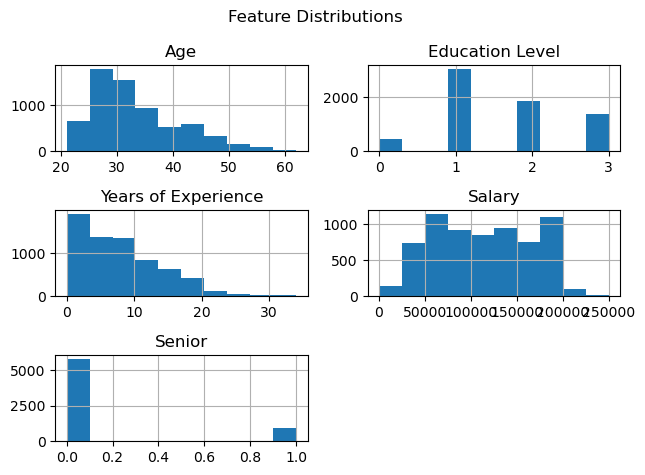

In [35]:
#histagram istribution.
df.hist()

plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

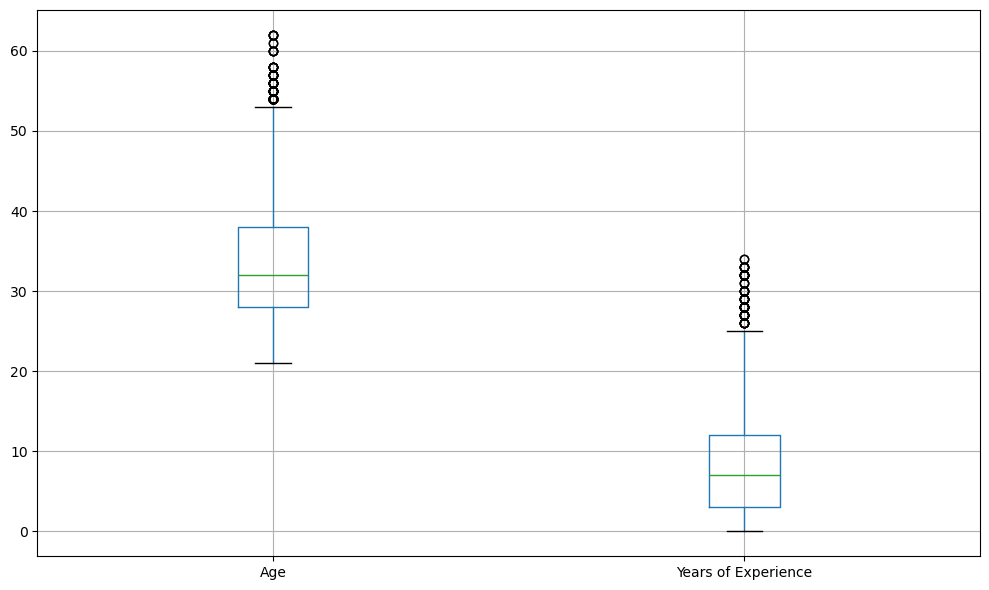

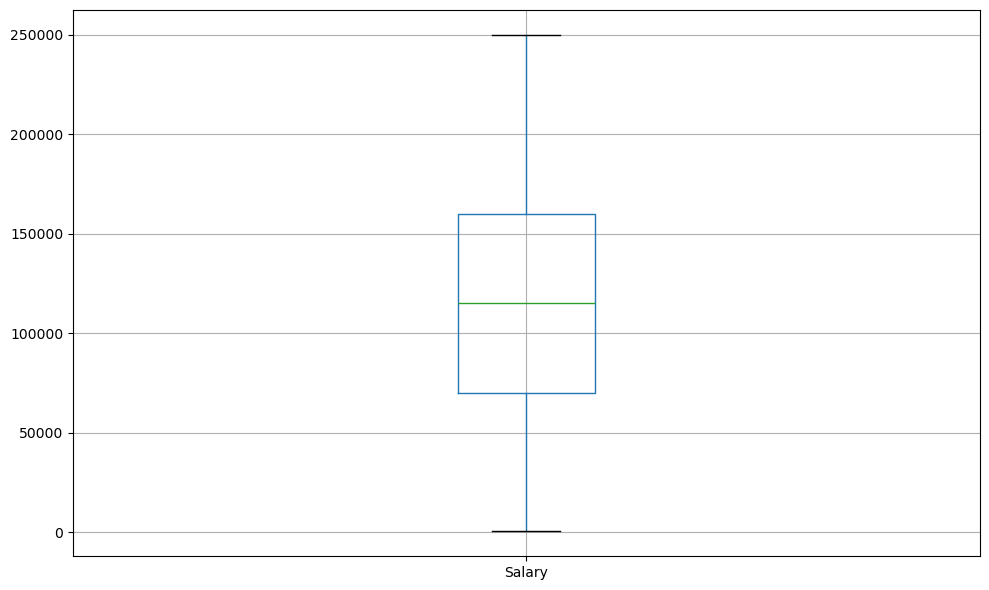

Age's upper outliers:
1209    61.0
1221    57.0
1223    62.0
1234    62.0
1238    55.0
        ... 
3041    54.0
3050    54.0
3067    54.0
3087    54.0
3103    54.0
Name: Age, Length: 119, dtype: float64
Years of Experience's upper outliers:
2382    30.0
2387    28.0
2391    33.0
2393    27.0
2396    33.0
        ... 
3059    26.0
3067    32.0
3087    30.0
3103    28.0
3109    26.0
Name: Years of Experience, Length: 69, dtype: float64


In [37]:
# find outliers with boxplot
df.boxplot(column=['Age', 'Years of Experience'], figsize=(10, 6))
plt.tight_layout()
plt.show()

# salary graphed in a different graph because it has larger values
df.boxplot(column=['Salary'], figsize=(10, 6))
plt.tight_layout()
plt.show()

# find outliers in data (use code from discussion 1)
col_to_graph =['Age', 'Years of Experience', 'Salary']
for feature in col_to_graph:  # calculate for each of the identified attributes
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1 #interquartile range: i.e. the box of the boxplot.
    lower_bound = q1 - 1.5 * iqr #lower line.
    upper_bound = q3 + 1.5 * iqr #upper line.
    #modify outliers to values.
    outliers_lower = df[feature] < lower_bound
    outliers_upper = df[feature] > upper_bound

    # print the outliers
    if outliers_upper.any():
        print(f"{feature}'s upper outliers:\n{df.loc[outliers_upper, feature]}")
    if outliers_lower.any():
        print(f"{feature}'s lower outliers:\n{df.loc[outliers_lower, feature]}")

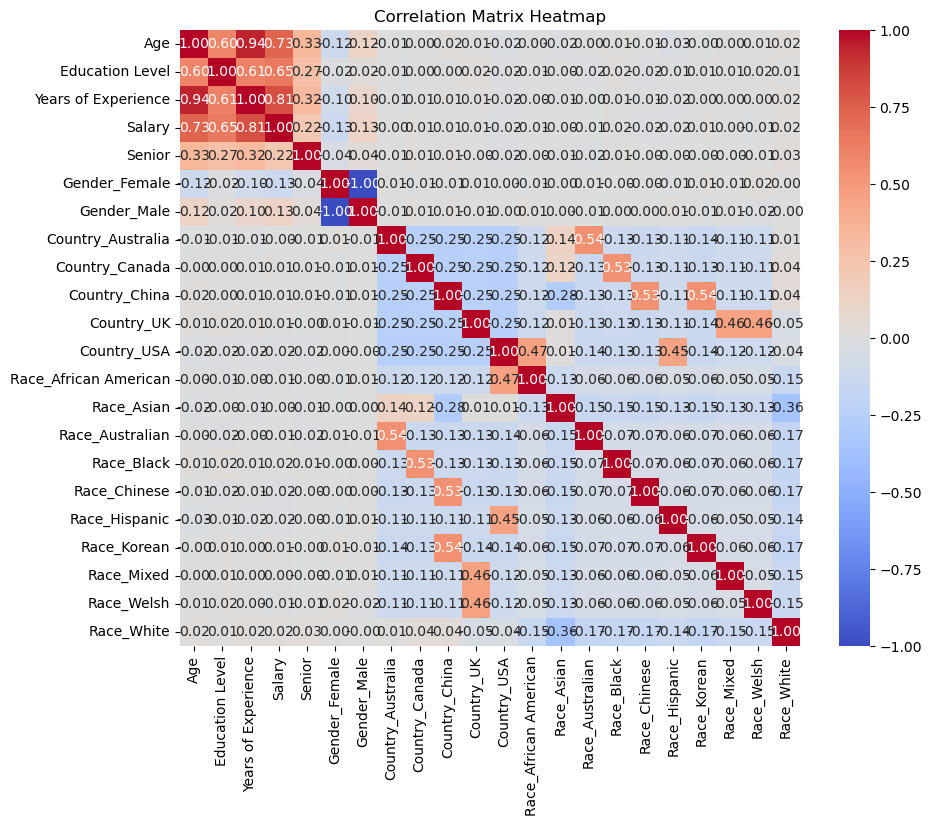

In [39]:
# finding correlation

# using normalized_X does not work because it is a numpy array
# data standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df_encoded
normalized_X = scaler.fit_transform(X)
normalized_Y = scaler.fit_transform(y)


# find correlation (use code from lab 0)
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# feature selection
# eliminate features that are highly correlated to reduce overfitting and improve the overall accuracy of the model

# example: eliminate either age or years of experience because they have a correlation of 0.94
# X = X.drop(columns=['Age'])

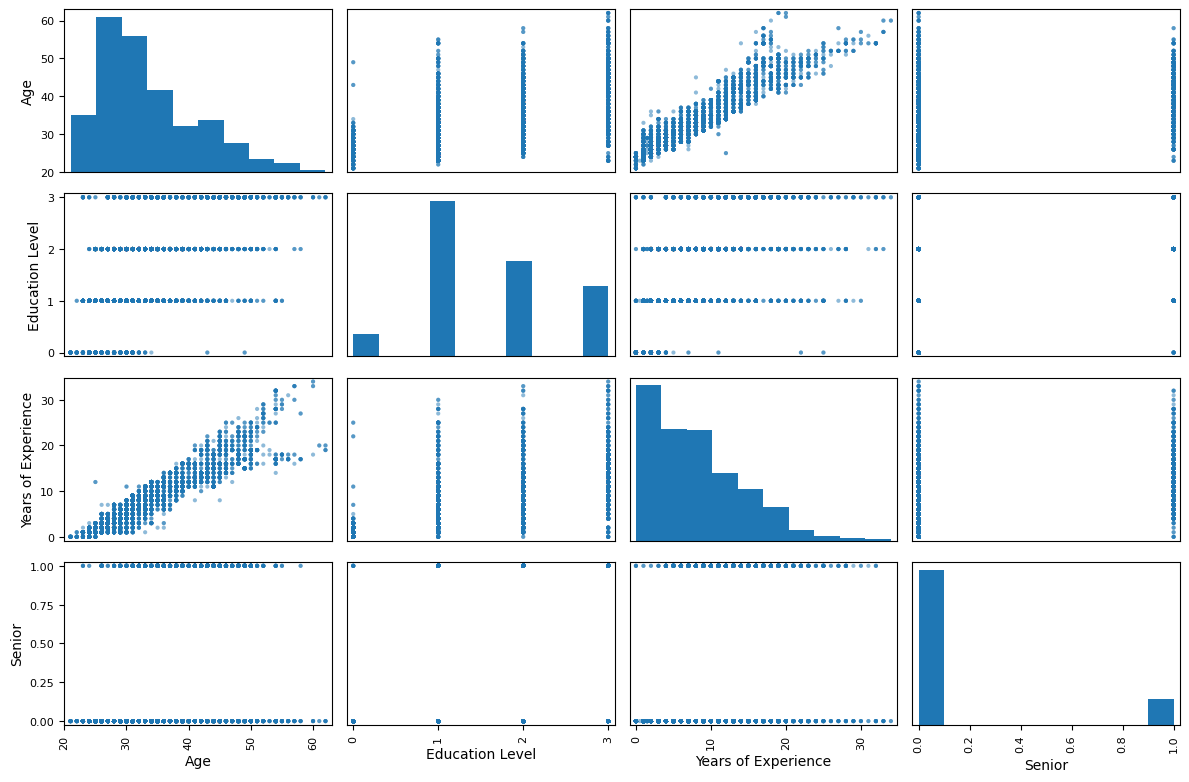

In [22]:
pd.plotting.scatter_matrix(X, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [23]:
X

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,USA,Asian,0
...,...,...,...,...,...,...,...,...
6679,49.0,Female,3,Director of Marketing,20.0,UK,Mixed,0
6680,32.0,Male,0,Sales Associate,3.0,Australia,Australian,0
6681,30.0,Female,1,Financial Manager,4.0,China,Chinese,0
6682,46.0,Male,2,Marketing Manager,14.0,China,Korean,0
